# 3. Búsqueda #
Profesor: Eric S. Tellez <eric.tellez@infotec.mx>


## Notas preliminares.
- Entienda, implemente y pruebe algoritmos de búsqueda, teniendo como guía las lecturas y actividades presentes en este documento.
- Revise el documento. Si hay dudas o comentarios favor de hacermelo saber y se harán las aclaraciones y correcciones necesarias.


## Introducción

En esta tema se aborda la búsqueda en arreglos ordenados, y abusando del término, muchas veces les llamaremos listas ordenadas. Entendemos  como lista ordenada un arreglo
$A[1,n] = a_1,a_2,\cdots,a_n$, el cual cumple con la propiedad $a_i \leq a_{i+1}$ para todo $1 \leq i \leq n-1$. Recuerde que a lo largo de este curso, esta será nuestra representación para conjuntos. Es muy común encontrar en la literatura,
y en este curso, que se aborde el tema con un modelo de costo basado en comparaciones, esto es, cada comparación $<$ provoca costo constante $O(1)$.
Esto se hace porque la comparación es una operación _persistente_  dentro de la lógica de estos algoritmos, y es un excelente factorizador de las operaciones que se realizan.
Esto debería ser claro una vez que se comprendan los algoritmos.

Utilizaremos como base el artículo [@Bentley76], que es de lectura forzosa. Nos apoyaremos en una serie de lecturas adicionales para comprender y madurar el concepto.

Se realizará una práctica, en la cual deberá crear un índice invertido. El código básico se encontrará a lo largo de este notebook, también los datos para inicializarlo.


## Lectura y comprensión

- El artículo sobre búsqueda no acotada, como representativo sobre búsqueda adaptativa [@Bentley76].
- Cap. 12 de [@Sedgewick98], en partícular Sec. 12.3 y 12.4.
- Cap. 6 de [@Knuth98], en partícular Sec. 6.1 y 6.2.
- El artículo sobre búsqueda adaptativa secuencial [@Bentley85].
- Recuerde la referencia básica para la notación y conceptos es [@Cormen01].

## Actividad 

1. Realizar las actividades de lectura y comprensión.
  - De preferencia realice los ejercicios de las secciones relacionadas.
2. Revise el procedimiento para crear los datos, es decir, siga el procedimiento de creación del índice invertido con los tweets proporcionados.
  - Note que de manera natural se crearán arreglos ordenados.
  - Los archivos ya fueron generados y se le pondrán a su disposición, sin embargo, se le hace un llamado a estudiar el proceso completo, ya que se seguirá utilizando durante todo el curso.
4. Realice y reporte el siguiente experimento:
  - Use el archivo `listas-posteo-100.json`, contiene las 100 listas de posteo más frecuentes, se encuentran en formato JSON.
  - Utilice las listas (sin el término asociado).
  - Los usuarios de Julia deberán asegurar que los tipos de los arreglos es `Int` y no `Any` para asegurar la velocidad adecuada
  - Seleccione 1000 identificadores de documentos al azar, entre $1$ y $n$, recuerde que $n=50,000$.
  - Acumule el tiempo de _buscar_ los 1000 identificadores en cada una de las listas (un solo número que represente las $100\times 1000$ búsquedas). Nota: lo que determinará al buscar es la _posición de inserción_ que se define como el lugar donde debería estar el identificador si se encontrara en la lista.
  - Los algoritmos que caracterizará son los siguientes (nombres con referencia a [@Bentley76]):
      - Búsqueda secuencial $B_0$
      - Búsqueda binaria $B_1$
      - Búsqueda doblada $B_2$
      - Búsqueda casí optima $B_k$

  - Importante: Tal vez deba repetir varias veces cada búsqueda si los tiempos son muy pequeños.
  - ¿Cómo podría encontrar aquellos documentos que contengan lo siguientes?
    - Un termino dado, e.g., `mexico`
    - Que contengan dos términos, e.g., `mexico` y `empresarios`
    - Bozqueje un algoritmo que realice la operación anterior y bozqueje el costo en comparaciones con respecto a los tamaños de las dos listas de posteo, $m$ y $n$.
    
5. El reporte deberá ser en formato notebook y el PDF del mismo notebook. El notebook debe contener las implementaciones de $B_0, B_1, B_2,$ y $B_k$. Recuerde que el reporte debe llevar claramente su nombre, debe incluir una introducción, la explicación de los experimentos realizados, las observaciones y conclusiones, así como también contestar las preguntas de las actividades.

Nota: En las implementaciones podrá usar comparación $<$, $\leq$, o incluso $cmp \rightarrow \{-1, 0, 1\}$, teniendo en cuenta que $cmp$ es común en lenguajes modernos, solo debe indicarlo.

## Referencias #
- [@Knuth98]: Donald E. Knuth. 1998. The Art of Computer Programming, Volume 3: (2nd Ed.) Sorting and Searching. Addison Wesley Longman Publishing Co., Inc., Redwood City, CA, USA.
- [@Bentley76]: Jon Louis Bentley, Andrew Chi-Chih Yao. An almost optimal algorithm for unbounded searching. Information Processing Letters, Volume 5, Issue 3, 1976, Pages 82-87. ISSN 0020-0190. https://doi.org/10.1016/0020-0190(76)90071-5.
- [@Bentley85]: Bentley, J.L., McGeoch, C.C. Amortized analyses of self-organizing sequential search heuristics. (1985) Communications of the ACM, 28 (4), pp. 404-411. Doi: 10.1145/3341.3349. 
- [@Cormen01]: Cormen et. al. Introduction to algorithms. MIT press 2001. 2nd edition.
- [@Sedgewick98]: Robert Sedgewick. Algorithms in C++ - Parts 1-4: Fundamentals, Data Structures, Sorting, Searching. Addison-Wesley-Longman, 1998. 3rd Edition.

# Creando un índice invertido


Crearemos un índice invertido usando 50'000 tweets públicos y reales, de contenido político. No hubo ningún tipo de censura en los textos, por lo cual se recomienda discreción. Los tweets fueron colectados durante epoca de la campaña presidencial 2018.

El formato original de los tweets es [JSON](https://es.wikipedia.org/wiki/JSON), el archivo que se utilizará contiene un tweet por linea, es decir, cada linea es un JSON valido.

La idea por el momento es crear unicamente lo necesario, con la menor cantidad de dependencias. 


## Preparación de los datos

El primer paso, claramente, será leer los datos

In [1]:
using JSON
using Unicode

"""
Lee los tweets desde un archivo codificado con un JSON por linea
"""
function load_tweets(filename)
    L = Dict{String,Any}[]
    open(filename) do f
        for line in eachline(f)
            push!(L, JSON.parse(line))
        end
    end
    
    L
end


load_tweets

Como segundo paso, debemos convertir el texto a simbolos, estos serán las palabras. Para este proceso, vamos a simplificar el texto y luego crear una bolsa de palabras (la cual es un `multiset`), y para eso se realizarán algunas normalizaciones y procesamientos simples:
- bajar a minúsculas
- se removerán símbolos de puntuación y otros no alfanuméricos
- se removerán acentos, ñ -> n, etc
- se removerán las urls
- se removerán las palabras comunes (_stopwords_)
- vamos a preservar los simbolos `#` y `@` que son especiales en Twitter.

Nota: No es el objeto de este curso el procesamiento de lenguaje natural, por lo que no se abordará más que lo esencial para tener la estructura deseada, sin embargo  me gustaría investigarán otras funciones y de ser posible, las apliquen.

In [2]:
const TERM_RE = r"[a-zñáéíóúü#@_]+"sm
const URL_RE = r"https\S+"sm

const STOPWORDS = Set(["de", "la", "el", "a", "y", "en", "que","con", "los", "se", "del", "para", "no", "por", "las", "su", "un", "al", "es",
    "lo", "como", "una", "mas", "le", "si", "ya","esta", "pero", "sobre", "pais",  "entre", "sus", "asi", "tras", "este", "sera", "fue", "via", "son", "dice", "ser",
    "me", "nuevo", "o", "tiene", "sin", "te", "todos", "todo", "ha", "nos", "ahora", "solo", "desde", "les", "hay", 
    "quien", "ni", "mi", "tambien", "hasta", "contra", "porque", "muy", "eso", "habra", "yo",
    "cuando", "bien", "donde", "esto", "pide", "debe", "estos", "vamos", "ante", "e",  "tu", "hace", "hacer", 
    "despues", "nada", "quienes", "antes", "mejor", "parte", "ver"])

"""
Borra acentos
"""
function remove_accute(text)
    L = Char[]
    for u in Unicode.normalize(text, :NFD)
        o = Int(u)
        if 0x300 <= o && o <= 0x036F
            continue
        end
        
        push!(L, u)
    end
    
    join(L)
end

"""
Crea una bolsa de palabras de un texto
"""
function create_bow(text)
    b = Dict{String, Int}()
    text = replace(lowercase(text), URL_RE => "")

    for m in eachmatch(TERM_RE, text)
        term = m.match
        if term in STOPWORDS
            continue
        end
        term = remove_accute(term)
        # term = m.match
        c = get(b, term, 0)
        b[term] = c + 1
    end
    
    b
end


create_bow

## Construcción
Como ya se había comentado, un índice invertido es una tabla dispersa de apuntadores (índices) de ocurrencia de la forma $\textsf{palabra} \rightarrow \textsf{lista de documentos}$, por ahora se implementará con un diccionario (Dict, i.e., tabla hash) y arreglos ordenados para la listas de documentos, también llamada _listas de posteo_.

In [3]:
function create_inverted_index(tweets)
    invindex = Dict{String,Vector{Int}}()

    for (tweetID, tweet) in enumerate(tweets)
        bow = create_bow(tweet["text"])
 
        for (term, freq) in bow
            # se ignora la frecuencia por ahora
            posting_list = get(invindex, term, nothing)
            if posting_list == nothing
                invindex[term] = [tweetID]
            else
                push!(posting_list::Vector{Int}, tweetID)
            end
        end
            
    end
        
    invindex
end

    
function prepare_collection()
    tweets = load_tweets("politicos.json")
    invindex = create_inverted_index(tweets)

    tweets, invindex
end



prepare_collection (generic function with 1 method)

In [4]:
tweets, invindex = prepare_collection()
@info length(tweets), length(invindex)

┌ Info: (50000, 38554)
└ @ Main In[4]:2


In [5]:
I = collect(invindex)
sort!(I, by=x -> -length(x.second))  # ordenamiento descendente por frecuencia

38554-element Array{Pair{String,Array{Int64,1}},1}:
             "amlo" => [5, 8, 12, 14, 20, 22, 24, 28, 29, 32  …  49990, 49991, 49993, 49994, 49995, 49996, 49997, 49998, 49999, 50000]
   "@lopezobrador_" => [2, 3, 7, 9, 11, 12, 15, 16, 18, 19  …  49963, 49967, 49968, 49975, 49978, 49982, 49983, 49984, 49985, 49990]
       "presidente" => [9, 10, 11, 26, 41, 45, 73, 78, 83, 90  …  49889, 49892, 49933, 49941, 49943, 49956, 49958, 49964, 49965, 49986]
           "mexico" => [10, 13, 14, 15, 21, 25, 27, 30, 36, 40  …  49806, 49835, 49839, 49857, 49877, 49884, 49889, 49926, 49930, 49943]
      "#elecciones" => [1, 3, 6, 7, 12, 16, 18, 19, 24, 27  …  49316, 49416, 49470, 49595, 49708, 49759, 49785, 49907, 49945, 49954]
             "pena" => [12, 26, 66, 98, 102, 265, 270, 275, 285, 294  …  49904, 49912, 49915, 49917, 49929, 49940, 49962, 49966, 49980, 49989]
            "#amlo" => [3, 4, 10, 17, 30, 38, 43, 49, 63, 66  …  49863, 49869, 49882, 49883, 49905, 49943, 49963, 49965, 49986, 499

## Partición de los datos para el experimento
Se tomarán las 100 listas de posteo más pobladas, con la idea de ser utilizados para caracterizar los algoritmos. Es importante hacer notar que dado el procedimiento, las listas de posteo son generadas a través de un procedimiento no sintético.

In [6]:
open("listas-posteo-100.json", "w") do f
    JSON.print(f, I[1:100])
end

## Zipf law

Como recordarán, la ley de Zipf aplicada a texto en un lenguaje natural sigue una ley de potencia: pocos términos ocurren muy frecuentemente y muchos ocurren poco. En esta colección es como sigue.

In [7]:
# initialize the plotting library
using Plots
gr()
print([x.first for x in I[1:200]])

["amlo", "@lopezobrador_", "presidente", "mexico", "#elecciones", "pena", "#amlo", "@epn", "gobierno", "reunion", "nieto", "mas", "lopez", "obrador", "triunfo", "trump", "nacional", "que", "pais", "#mexico", "electo", "asi", "@inemexico", "sera", "pompeo", "manuel", "equipo", "transicion", "andres", "via", "seguridad", "gabinete", "palacio", "#transicion", "virtual", "morena", "estado", "encuentro", "presidencial", "va", "esta", "#envivo", "eleccion", "empresarios", "anos", "elecciones", "campana", "@ricardoanayac", "votos", "dijo", "electoral", "durante", "video", "victoria", "hoy", "plan", "proximo", "secretario", "@accionnacional", "corrupcion", "politica", "gobernadores", "mike", "propuesta", "tambien", "epn", "partido", "pri", "aqui", "enrique", "millones", "si", "anaya", "casa", "eu", "julio", "pan", "habra", "presidencia", "mil", "reune", "poder", "nueva", "apoyo", "como", "@pri_nacional", "mexicanos", "el", "mayoria", "#enterate", "gano", "resultados", "asegura", "mensaje", "@j

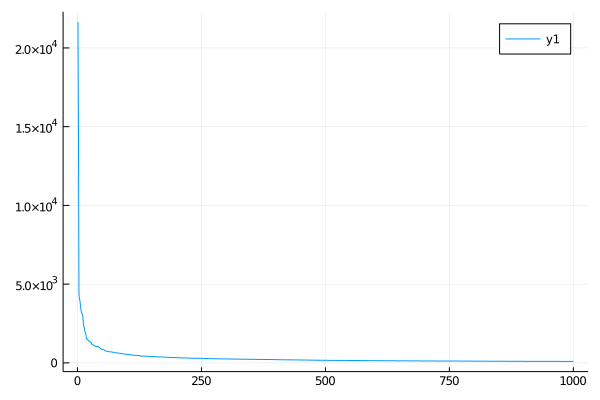

In [8]:
#plot([length(x.second) for x in I[1:100]])
plot([length(x.second) for x in I[1:1000]])